### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
dataset = pd.read_csv('IMDB_Movies_India.csv', encoding='latin-1')

In [3]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### Data Analysis

In [4]:
dataset.shape

(15509, 10)

In [5]:
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
dataset.duplicated().sum()

6

In [8]:
dataset.fillna({
    'Year': dataset['Year'].mode()[0],
    'Duration': dataset['Duration'].mode()[0],
    'Genre': dataset['Genre'].mode()[0],
    'Votes': dataset['Votes'].mode()[0],
    'Rating': dataset['Rating'].mean(),
    'Director': dataset['Director'].mode()[0],
    'Actor 1': dataset['Actor 1'].mode()[0],
    'Actor 2': dataset['Actor 2'].mode()[0],
    'Actor 3': dataset['Actor 3'].mode()[0]
}, inplace=True)

In [9]:
dataset.shape

(15509, 10)

In [10]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,(2019),120 min,Drama,5.841621,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,5.841621,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [11]:
dataset.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [12]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(15503, 10)

In [13]:
dataset.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

### Data preprocessing

In [14]:
dataset['Year'] = dataset['Year'].str.replace('(', '').str.replace(')', '').astype(int)

In [15]:
dataset['Duration'] = dataset['Duration'].str.replace(' min', '').astype(int)

In [16]:
# Split the 'Genre' column by ', ' and explode it
exploded_genre = dataset['Genre'].str.split(', ').explode()
# Fill missing values with the mode of 'Genre' column
exploded_genre.fillna(dataset['Genre'].mode()[0], inplace=True)
# Reset the index
exploded_genre = exploded_genre.reset_index(drop=True)
# Assign the modified 'Genre' column back to the DataFrame
dataset['Genre'] = exploded_genre

In [17]:
# Remove non-numeric characters (such as commas and 'M') from the 'Votes' column
dataset['Votes'] = dataset['Votes'].str.replace(',', '')
dataset['Votes'] = dataset['Votes'].str.replace('M', '')

# Convert the 'Votes' column to integers
dataset['Votes'] = pd.to_numeric(dataset['Votes'], errors='coerce')  # 'coerce' handles non-numeric values by converting them to NaN

# Fill NaN values with a suitable default value, such as 0
dataset['Votes'].fillna(0, inplace=True)

# Convert the 'Votes' column to integers (again)
dataset['Votes'] = dataset['Votes'].astype(int)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26172\3575255103.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Votes'].fillna(0, inplace=True)


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15503 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15503 non-null  object 
 1   Year      15503 non-null  int32  
 2   Duration  15503 non-null  int32  
 3   Genre     15503 non-null  object 
 4   Rating    15503 non-null  float64
 5   Votes     15503 non-null  int32  
 6   Director  15503 non-null  object 
 7   Actor 1   15503 non-null  object 
 8   Actor 2   15503 non-null  object 
 9   Actor 3   15503 non-null  object 
dtypes: float64(1), int32(3), object(6)
memory usage: 1.1+ MB


### Data visualization

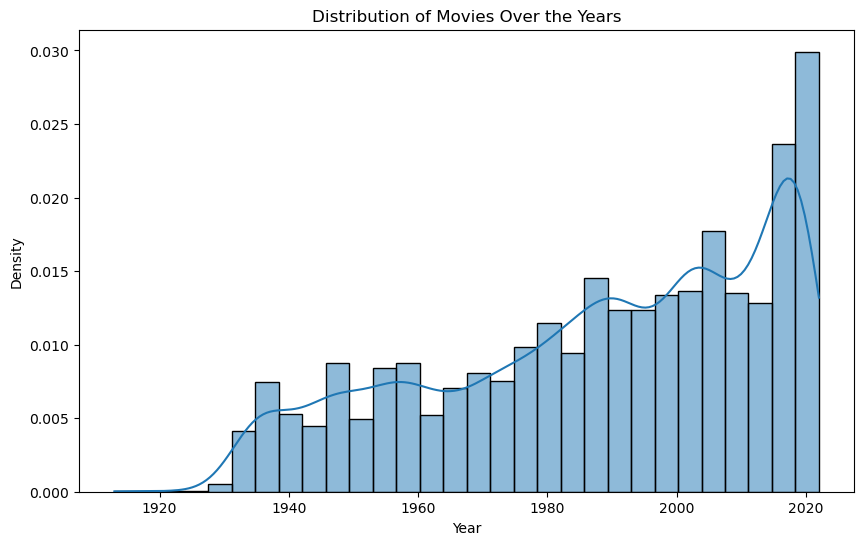

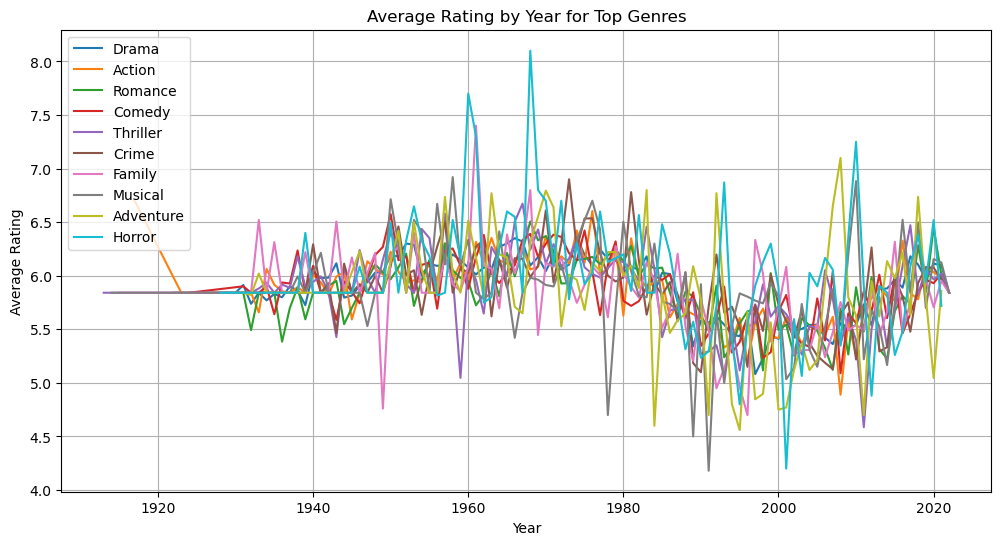

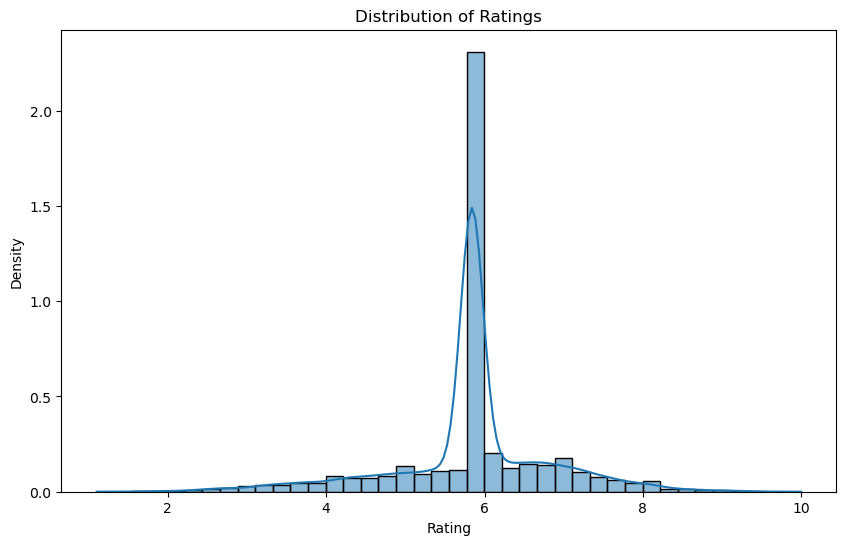

In [19]:
# Histogram of movie counts per year
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Year', kde=True, bins=30, stat='density')
plt.title('Distribution of Movies Over the Years')
plt.xlabel('Year')
plt.ylabel('Density')
plt.show()

# Average rating by year for top genres
top_genres = dataset['Genre'].value_counts().head(10).index
avg_rating_by_year = dataset.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()
avg_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
for genre in top_genres:
    data = avg_rating_by_year[avg_rating_by_year['Genre'] == genre]
    plt.plot(data['Year'], data['Rating'], label=genre)

plt.title('Average Rating by Year for Top Genres')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()
plt.grid(True)
plt.show()

# Histogram of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Rating', kde=True, bins=40, stat='density')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()


In [20]:
# Importing essential libraries for model building
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [21]:
# Dropping Name column because it doesn't impact the outcome
dataset.drop('Name', axis = 1, inplace = True)

### Feature engineering

In [22]:
dataset['Genre_mean_rating'] = dataset.groupby('Genre')['Rating'].transform('mean')
dataset['Director_encoded'] = dataset.groupby('Director')['Rating'].transform('mean')
dataset['Actor1_encoded'] = dataset.groupby('Actor 1')['Rating'].transform('mean')
dataset['Actor2_encoded'] = dataset.groupby('Actor 2')['Rating'].transform('mean')
dataset['Actor3_encoded'] = dataset.groupby('Actor 3')['Rating'].transform('mean')

### Define predictor and target variables

In [23]:
X = dataset[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = dataset['Rating']

### Split the dataset into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(X_train)

       Year  Votes  Duration  Genre_mean_rating  Director_encoded  \
10868  1992      8       120           5.858019          5.841621   
9800   1966      8       120           5.821934          6.181794   
12164  1962      8       120           5.858019          5.841621   
9425   2014     11        99           5.858019          5.278786   
15035  2020   2413       126           5.858019          7.500000   
...     ...    ...       ...                ...               ...   
5194   1953      8       120           5.821934          5.838420   
13424  2004    203       174           5.844130          6.205946   
5393   1999      6       120           5.833908          5.572587   
860    2021      8       120           5.858019          5.841621   
7273   1960    415       150           5.858019          6.929412   

       Actor1_encoded  Actor2_encoded  Actor3_encoded  
10868        4.920811        5.521216        5.800676  
9800         5.841621        5.841621        5.706543  
121

In [26]:
print(y_train)

10868    5.841621
9800     5.841621
12164    5.841621
9425     7.800000
15035    7.500000
           ...   
5194     5.841621
13424    4.600000
5393     2.800000
860      5.841621
7273     7.900000
Name: Rating, Length: 12402, dtype: float64


In [27]:
print(X_test)

       Year  Votes  Duration  Genre_mean_rating  Director_encoded  \
11935  2003    268        50           5.858019          5.966667   
11402  2007     77       113           5.831565          5.650000   
4924   1972     68       129           5.858019          5.909341   
15257  2000      8       120           5.821934          5.841621   
6708   2016      8        52           5.821934          5.841621   
...     ...    ...       ...                ...               ...   
13342  1969      5       120           5.858019          5.450000   
11627  2021      8       120           5.807703          5.985405   
5148   1940      8       120           5.858019          5.841621   
13178  2011     23       116           5.858019          6.300000   
7510   1980     16       134           5.834734          5.835771   

       Actor1_encoded  Actor2_encoded  Actor3_encoded  
11935        4.933333        6.100000        6.100000  
11402        5.315976        4.125000        3.050000  
492

In [28]:
print(y_test)

11935    6.100000
11402    3.600000
4924     5.800000
15257    5.841621
6708     5.841621
           ...   
13342    6.000000
11627    5.841621
5148     5.841621
13178    7.800000
7510     5.800000
Name: Rating, Length: 3101, dtype: float64


### Build and train the model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Print evaluation metrics
    print(f'Model: {name}')
    print(f'Mean squared error: {mse}')
    print(f'Mean absolute error: {mae}')
    print(f'R2 score: {r2}')
    print('------------------------------------')


Model: Linear Regression
Mean squared error: 0.28188598522492586
Mean absolute error: 0.3471181983492638
R2 score: 0.7108595379303929
------------------------------------
Model: Decision Tree Regressor
Mean squared error: 0.4516453660422862
Mean absolute error: 0.34622135709038054
R2 score: 0.5367313145246921
------------------------------------
Model: Random Forest Regressor
Mean squared error: 0.22172121324836694
Mean absolute error: 0.24991746426934258
R2 score: 0.7725726804115061
------------------------------------


In [30]:
print(predictions)

[6.         3.013      6.11341621 ... 5.84162142 7.68441621 5.66741621]


In [31]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

### Predict a new movie rating

In [32]:
new_data = pd.DataFrame({
    'Year': [2019], 'Votes': [36], 'Duration': [111],
    'Genre_mean_rating': [5.8], 'Director_encoded': [4.5],
    'Actor1_encoded': [5.3], 'Actor2_encoded': [4.5], 'Actor3_encoded': [4.5]
})
predicted_rating = regressor.predict(new_data)
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 4.448248642505367
